# Evironment setup

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

# install findspark using pip
!pip install findspark
!pip install pyspark

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

     |████████████████████████████████| 281.3 MB 34 kB/s 
     |████████████████████████████████| 198 kB 60.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=9c4b130d3effd26745c1c8971f16000062088de2a4360256ade53475aafb235a
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


Import libraries

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import pyspark.sql.functions as func

from google.colab import files

# Data inspecting

In [3]:
# upload csv file to Google Colab
uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


In [4]:
# read csv file to dataset
dataset = spark.read.csv('water_potability.csv',inferSchema=True, header =True).cache()

# count number of row and print the schema
print(dataset.count())
dataset.printSchema()

3276
root
 |-- ph: double (nullable = true)
 |-- Hardness: double (nullable = true)
 |-- Solids: double (nullable = true)
 |-- Chloramines: double (nullable = true)
 |-- Sulfate: double (nullable = true)
 |-- Conductivity: double (nullable = true)
 |-- Organic_carbon: double (nullable = true)
 |-- Trihalomethanes: double (nullable = true)
 |-- Turbidity: double (nullable = true)
 |-- Potability: integer (nullable = true)



In [5]:
# show top 10 row of dataset
dataset.show(10)

+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------+
|                ph|          Hardness|            Solids|       Chloramines|           Sulfate|      Conductivity|    Organic_carbon|   Trihalomethanes|         Turbidity|Potability|
+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------+
|              null| 204.8904554713363|20791.318980747026| 7.300211873184757|368.51644134980336| 564.3086541722439|  10.3797830780847|  86.9909704615088|2.9631353806316407|         0|
|  3.71608007538699|129.42292051494425|18630.057857970347|    6.635245883862|              null| 592.8853591348523|15.180013116357259| 56.32907628451764| 4.500656274942408|         0|
| 8.099124189298397|224.23625939355776|19909.541732292393| 9.275883602694089|   

In [6]:
# function to return min, max, average values
def min_max_avg(datset, col, opt):
    return dataset.agg({col: opt}).select(opt + "(" + col + ")").collect()[0][0]

# function to print min, max, average values
def print_min_max_avg(dataset, col):
    print(col + ":")
    print(" min =", min_max_avg(dataset, col, "min"))
    print(" max =", min_max_avg(dataset, col, "max"))
    print(" avg =", min_max_avg(dataset, col, "avg"))
    print(" med =", dataset.approxQuantile([col], [0.5], 0)[0][0])

In [7]:
print_min_max_avg(dataset, "ph")
print_min_max_avg(dataset, "Hardness")
print_min_max_avg(dataset, "Solids")
print_min_max_avg(dataset, "Chloramines")
print_min_max_avg(dataset, "Sulfate")
print_min_max_avg(dataset, "Conductivity")
print_min_max_avg(dataset, "Organic_carbon")
print_min_max_avg(dataset, "Trihalomethanes")
print_min_max_avg(dataset, "Turbidity")


ph:
 min = 0.0
 max = 13.999999999999998
 avg = 7.080794504276819
 med = 7.036752103833548
Hardness:
 min = 47.432
 max = 323.124
 avg = 196.36949601730177
 med = 196.95287516726086
Solids:
 min = 320.942611274359
 max = 61227.19600771213
 avg = 22014.09252607711
 med = 20922.154463374245
Chloramines:
 min = 0.3520000000000003
 max = 13.127000000000002
 avg = 7.122276793425787
 med = 7.130161148170633
Sulfate:
 min = 129.00000000000003
 max = 481.03064230599716
 avg = 333.7757766108134
 med = 333.073545745888
Conductivity:
 min = 181.483753985146
 max = 753.3426195583046
 avg = 426.2051106825521
 med = 421.87985373320026
Organic_carbon:
 min = 2.1999999999999886
 max = 28.30000000000001
 avg = 14.284970247677341
 med = 14.217372572687509
Trihalomethanes:
 min = 0.7379999999999995
 max = 124.0
 avg = 66.39629294676803
 med = 66.6210265451665
Turbidity:
 min = 1.45
 max = 6.739
 avg = 3.9667861697910576
 med = 3.9549642917273493


In [8]:
# check for null values
print("Count null values:")
print("ph:", dataset.filter('ph IS NULL').rdd.map(lambda x : x[0]).count())
print("Hardness:", dataset.filter('Hardness IS NULL').rdd.map(lambda x : x[1]).count())
print("Solids:", dataset.filter('Solids IS NULL').rdd.map(lambda x : x[2]).count())
print("Chloramines:", dataset.filter('Chloramines IS NULL').rdd.map(lambda x : x[3]).count())
print("Sulfate:", dataset.filter('Sulfate IS NULL').rdd.map(lambda x : x[4]).count())
print("Conductivity:", dataset.filter('Conductivity IS NULL').rdd.map(lambda x : x[5]).count())
print("Organic_carbon:", dataset.filter('Organic_carbon IS NULL').rdd.map(lambda x : x[6]).count())
print("Trihalomethanes:", dataset.filter('Trihalomethanes IS NULL').rdd.map(lambda x : x[7]).count())
print("Turbidity:", dataset.filter('Turbidity IS NULL').rdd.map(lambda x : x[8]).count())

Count null values:
ph: 491
Hardness: 0
Solids: 0
Chloramines: 0
Sulfate: 781
Conductivity: 0
Organic_carbon: 0
Trihalomethanes: 162
Turbidity: 0


# Data preprocessing

Processing null values

In [9]:
# replace null values with average values
dataset = dataset.fillna(min_max_avg(dataset, "ph", "avg"), "ph")
dataset = dataset.fillna(min_max_avg(dataset, "Sulfate", "avg"), "Sulfate")
dataset = dataset.fillna(min_max_avg(dataset, "Trihalomethanes", "avg"), "Trihalomethanes")

In [10]:
# normalize data using min-max normalization
dataset = dataset.withColumn('ph', (dataset.ph - min_max_avg(dataset, "ph", "min")) / (min_max_avg(dataset, "ph", "max") - min_max_avg(dataset, "ph", "min")))
dataset = dataset.withColumn('Hardness', (dataset.Hardness - min_max_avg(dataset, "Hardness", "min")) / (min_max_avg(dataset, "Hardness", "max") - min_max_avg(dataset, "Hardness", "min")))
dataset = dataset.withColumn('Solids', (dataset.Solids - min_max_avg(dataset, "Solids", "min")) / (min_max_avg(dataset, "Solids", "max") - min_max_avg(dataset, "Solids", "min")))
dataset = dataset.withColumn('Chloramines', (dataset.Chloramines - min_max_avg(dataset, "Chloramines", "min")) / (min_max_avg(dataset, "Chloramines", "max") - min_max_avg(dataset, "Chloramines", "min")))
dataset = dataset.withColumn('Sulfate', (dataset.Sulfate - min_max_avg(dataset, "Sulfate", "min")) / (min_max_avg(dataset, "Sulfate", "max") - min_max_avg(dataset, "Sulfate", "min")))
dataset = dataset.withColumn('Conductivity', (dataset.Conductivity - min_max_avg(dataset, "Conductivity", "min")) / (min_max_avg(dataset, "Conductivity", "max") - min_max_avg(dataset, "Conductivity", "min")))
dataset = dataset.withColumn('Organic_carbon', (dataset.Organic_carbon - min_max_avg(dataset, "Organic_carbon", "min")) / (min_max_avg(dataset, "Organic_carbon", "max") - min_max_avg(dataset, "Organic_carbon", "min")))
dataset = dataset.withColumn('Trihalomethanes', (dataset.Trihalomethanes - min_max_avg(dataset, "Trihalomethanes", "min")) / (min_max_avg(dataset, "Trihalomethanes", "max") - min_max_avg(dataset, "Trihalomethanes", "min")))
dataset = dataset.withColumn('Turbidity', (dataset.Turbidity - min_max_avg(dataset, "Turbidity", "min")) / (min_max_avg(dataset, "Turbidity", "max") - min_max_avg(dataset, "Turbidity", "min")))


In [11]:
dataset.show()

+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+----------+
|                 ph|           Hardness|             Solids|        Chloramines|            Sulfate|       Conductivity|     Organic_carbon|    Trihalomethanes|          Turbidity|Potability|
+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+----------+
| 0.5057710360197728| 0.5711390082822001| 0.3360964634654398| 0.5438913403667128| 0.6803852067559715| 0.6694394775245863| 0.3134016505013296| 0.6997531312286739| 0.2860910154342297|         0|
|0.26543429109907074| 0.2974004342343784| 0.3006114187901571|0.49183920813009774| 0.5816987273307169| 0.7194110818538585|0.49731851020525897|0.45099930460740245| 0.5767926403748171|         0|
| 0.5785088706641713| 0.64131080841

In [12]:
# count the dataset and drop duplicates
print(dataset.count())
print(dataset.dropDuplicates().count())

3276
3276


In [13]:
# save the processed dataset
dataset.write.csv("processed-water-potability.csv", header = True)

# Data visualization

In [14]:
dataset = spark.read.csv("processed-water-potability.csv", inferSchema=True, header =True).cache()

In [15]:
from pyspark.sql.functions import rand

sample = dataset.orderBy(rand()).sample(fraction=0.5, seed=41)

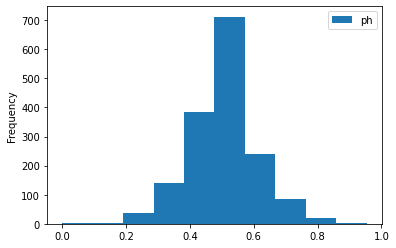

In [16]:
sample.toPandas().plot(y="ph", kind="hist")

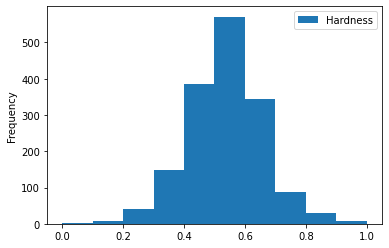

In [17]:
sample.toPandas().plot(y="Hardness", kind="hist")

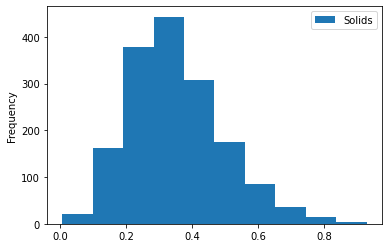

In [18]:
sample.toPandas().plot(y="Solids", kind="hist")

In [ ]:
sample.toPandas().plot(y="Chloramines", kind="hist")

In [ ]:
sample.toPandas().plot(y="Sulfate", kind="hist")

In [ ]:
sample.toPandas().plot(y="Conductivity", kind="hist")

In [ ]:
sample.toPandas().plot(y="Organic_carbon", kind="hist")

In [ ]:
sample.toPandas().plot(y="Trihalomethanes", kind="hist")

In [ ]:
sample.toPandas().plot(y="Turbidity", kind="hist")

In [ ]:
sample.toPandas().plot(y="Potability", kind="hist")

In [ ]:
sample.toPandas().plot(x="ph", y="Solids", c="Potability", s = 10, edgecolor='k', kind="scatter")

# Decision Tree

In [ ]:
from array import array

class StaticVal:
    class_values = 0
    dataset = list()


def test_split(index, value, dataset):

    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right


def gini_index(groups, classes):

    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0

    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p**2
        
        gini += (1.0 - score) * (size / n_instances)
    return gini


def calc_row_gini(fields):

    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    
    for index in range(len(fields) - 1):
        groups = test_split(index, fields[index], StaticVal.dataset)
        gini = gini_index(groups, StaticVal.class_values)
        if gini < b_score:
            b_index, b_value, b_score, b_groups = index, fields[index], gini, groups
    return [b_index, b_value, b_score, b_groups]


def get_min(x, y):

    b_index, b_value, b_score, b_groups = x[0], x[1], x[2], x[3]
    if x[2] > y[2]:
        b_index, b_value, b_score, b_groups = y[0], y[1], y[2], y[3]
    return b_index, b_value, b_score, b_groups


def get_split(dataset):

    StaticVal.class_values = list(set(row[-1] for row in dataset))
    StaticVal.dataset = dataset
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    dataRDD = spark.sparkContext.parallelize(dataset)

    giniRDD = dataRDD.map(lambda x : calc_row_gini(x))
    b_index, b_value, b_score, b_groups = giniRDD.reduce(lambda x, y : get_min(x, y))

    return {"index":b_index, "value":b_value, "groups":b_groups}


def split(node, max_depth, min_size, depth):

    left, right = node["groups"]
    del(node["groups"])

    if not left or not right:
        node["left"] = node["right"] = to_terminal(left + right)
        return

    if depth >= max_depth:
        node["left"], node["right"] = to_terminal(left), to_terminal(right)
        return

    if len(left) <=min_size:
        node["left"] = to_terminal(left)
    else:
        node["left"] = get_split(left)
        split(node["left"], max_depth, min_size, depth+1)

    if len(right) <= min_size:
        node["right"] = to_terminal(right)
    else:
        node["right"] = get_split(right)
        split(node["right"], max_depth, min_size, depth+1)


def to_terminal(group):

    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

def build_tree(train, max_depth, min_size):
	root = get_split(train)
	split(root, max_depth, min_size, 1)
	return root


def print_tree(node, depth = 0):

    if isinstance(node, dict):
        print('%s[X%d < %.3f]' % ((depth*" ", (node["index"] + 1), node["value"])))
        print_tree(node["left"], depth + 1)
        print_tree(node["right"], depth + 1)
    else:
        print("%s[%s]" % ((depth*" ", node)))


def predict(node, row):
    if row[node["index"]] <= node["value"]:
        if isinstance(node["left"], dict):
            return predict(node["left"], row)
        else:
            return node["left"]
    else:
        if isinstance(node["right"], dict):
            return predict(node["right"], row)
        else:
            return node["right"]

In [ ]:
train, test = dataset.randomSplit(weights=[0.8,0.2], seed=41)
tree = build_tree(train.toPandas().values.tolist(), 3, 3)
print_tree(tree)
DT_predicted = test.rdd.map(lambda x : (predict(tree, x[:-1]), x[-1]))
DT_predicted = DT_predicted.toDF(["predict", "label"])
DT_predicted.filter("predict = label").count()/DT_predicted.count()

# K-Nearest Neighbors

In [ ]:
from scipy.spatial import distance
from pyspark.sql.functions import monotonically_increasing_id, row_number
from pyspark.sql.window import Window
from pyspark.sql.functions import col, asc, desc
from pyspark.sql.types import StructType, StructField,  DoubleType

class K_Nearest_Neighbors_Classifier():
    def __init__(self, k = 3):
        self.k = k

    def fit(self, train):
        self.train = train

    def predict(self, test):
        result = list()

        for row in test.rdd.toLocalIterator():
            result.append((self.classify(row[0]), row[1]))
        return spark.createDataFrame(result, ["predict", "label"])

    def classify(self, row):
        euclidean = self.train.rdd.map(lambda x : (distance.euclidean(x[0], row), x[1])).toDF(["euclidean", "label"])

        result = euclidean.sort("euclidean").limit(self.k).\
                    groupBy("label").count().orderBy(col("count").desc()).collect()[0][0]
        del euclidean

        return result

Split train/test data

In [ ]:
# train test split
col_names = dataset.columns

train, test = dataset.randomSplit(weights=[0.8,0.2], seed=41)

train = train.rdd.map(lambda x : ([x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8]], x[9])).toDF(["features", "label"])
test = test.rdd.map(lambda x : ([x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8]], x[9])).toDF(["features", "label"])

In [31]:
KNN = K_Nearest_Neighbors_Classifier(3)
KNN.fit(train)
KNN_predicted = KNN.predict(test)
KNN_predicted.filter("predict = label").count()/KNN_predicted.count()
# Y_predicted.show()

0.5969230769230769

# Model evaluation

Confusion matrix

In [32]:
import matplotlib.pyplot as plt

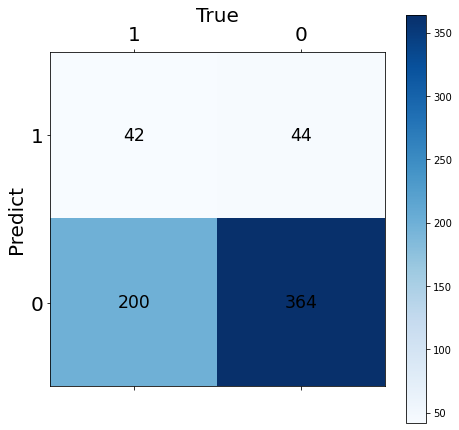

Precision: 0.4883720930232558
Recall: 0.17355371900826447
F1: 0.25609756097560976


In [33]:
DT_tp = DT_predicted.filter("label = 1 AND predict = 1").count()
DT_fp = DT_predicted.filter("label = 0 AND predict = 1").count()
DT_fn = DT_predicted.filter("label = 1 AND predict = 0").count()
DT_tn = DT_predicted.filter("label = 0 AND predict = 0").count()

conf_matrix = np.array([[DT_tp,DT_fp],[DT_fn,DT_tn]])

fig, ax = plt.subplots(figsize=(7.5, 7.5))
sc = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
ax.set_xlabel('True', fontsize=20)
ax.set_ylabel('Predict', fontsize=20)
ax.set_xticklabels(["", "1", "0"], fontsize="20")
ax.set_yticklabels(["", "1", "0"], fontsize="20")
ax.xaxis.set_label_position('top')
cbar = fig.colorbar(sc)
plt.show()

precision = DT_tp/(DT_tp+DT_fp)
print("Precision:", precision)
recall = DT_tp/(DT_tp+DT_fn)
print("Recall:", recall)
f1 = 2*precision*recall/(precision+recall)
print("F1:", f1)

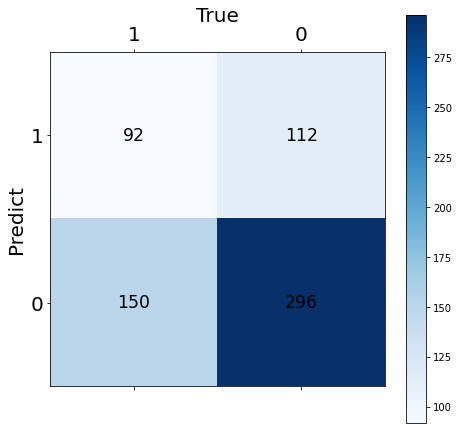

Precision: 0.45098039215686275
Recall: 0.38016528925619836
F1: 0.4125560538116592


In [34]:
KNN_tp = KNN_predicted.filter("label = 1 AND predict = 1").count()
KNN_fp = KNN_predicted.filter("label = 0 AND predict = 1").count()
KNN_fn = KNN_predicted.filter("label = 1 AND predict = 0").count()
KNN_tn = KNN_predicted.filter("label = 0 AND predict = 0").count()

conf_matrix = np.array([[KNN_tp,KNN_fp],[KNN_fn,KNN_tn]])

fig, ax = plt.subplots(figsize=(7.5, 7.5))
sc = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
ax.set_xlabel('True', fontsize=20)
ax.set_ylabel('Predict', fontsize=20)
ax.set_xticklabels(["", "1", "0"], fontsize="20")
ax.set_yticklabels(["", "1", "0"], fontsize="20")
ax.xaxis.set_label_position('top')
cbar = fig.colorbar(sc)
plt.show()

precision = KNN_tp/(KNN_tp+KNN_fp)
print("Precision:", precision)
recall = KNN_tp/(KNN_tp+KNN_fn)
print("Recall:", recall)
f1 = 2*precision*recall/(precision+recall)
print("F1:", f1)